# Data Visualization: Ford GoBike- 2017

## by Motunrayo Ilawole

## Preliminary Wrangling

> This dataset ccontains information about individual rides made in a bike system in the San Francisco Bay area.
The data source is gotten from https://www.fordgobike.com/system-data

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [5]:
df.shape

(519700, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


### Structure of the dataset:

> The dataset contains 519700 rows representing the records of the dataset, and 13 columns representing the following features:
1. duration_sec            
2. start_time                 
3. end_time                   
4. start_station_id           
5. start_station_name         
6. start_station_latitude     
7. start_station_longitude    
8. end_station_id             
9. end_station_name           
10. end_station_latitude       
11. end_station_longitude      
12. bike_id                    
13. user_type                  

### Main features of interest of Interest:

> The factors that affect trip duration.

> When most trips are taken in terms of time of day, day of the week, or
month of the year

> How long the average trip takes

> Whether the user being either a subscriber or customer affects how long the trip takes.

### Features to support Investigation:
1. Start date and End date
2. Duration of trip in minutes
3. User type

## Univariate Exploration

> In this section, distribution of individual variables will be investigated.

#### Case 1: How long the average trip takes

In [7]:
# Convert the duration_sec to duration_min
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec', axis = 1, inplace = True)

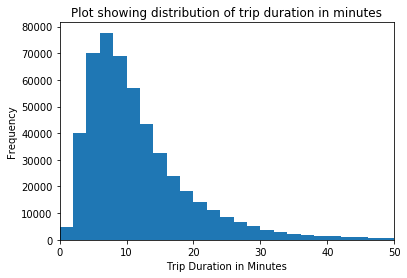

In [8]:
# Plot a histogram showing the distribution of durations of trips

bins = np.arange(0, df['duration_min'].max()+2, 2)
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xlim([0, 50]);
plt.xlabel('Trip Duration in Minutes');
plt.ylabel('Frequency');
plt.title('Plot showing distribution of trip duration in minutes');

> From the above plot, we can see that the histogram is right-skewed, with a long tail to the right. It is also evident that a greater number of people tend to go on trips with bikes for a short period of time.

#### Exploring the time in hours spent on bikes

In [9]:
df['duration_hour'] = df['duration_min'] / 60
df.duration_hour.describe()

count    519700.000000
mean          0.305280
std           0.956707
min           0.016944
25%           0.106111
50%           0.165556
75%           0.260556
max          23.991389
Name: duration_hour, dtype: float64

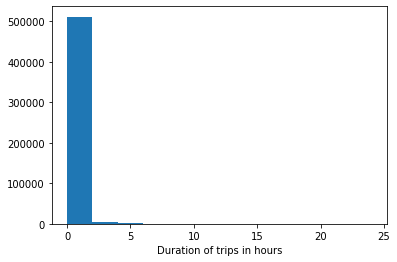

In [10]:
bins = np.arange(0, df['duration_hour'].max()+2, 2);
plt.hist(data = df, x = 'duration_hour', bins = bins);
plt.xlabel('Duration of trips in hours');

>The plot above shows that there are outliers present in the dataset. The values greater than 3 hours on the x-axis are not shown.

#### Case 2: Months distribution

In [11]:
# First, we extract the months from start_time and create a "month_start" column

df['start_month'] = pd.DatetimeIndex(df['start_time']).month
df['start_month'].value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: start_month, dtype: int64

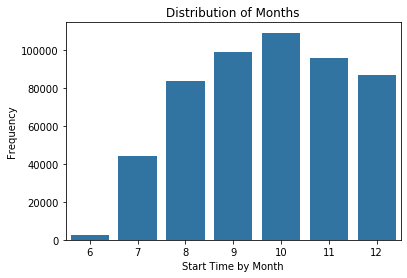

In [12]:
# Plot a bar chart to show the distribution of months
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_month', color=base_color)
plt.xlabel('Start Time by Month')
plt.ylabel('Frequency')
plt.title('Distribution of Months');

> From the plot above, we can see that the trips made in June are considerably lower than those made in the other months.

In [13]:
# Check the distribution of days in June
df_6 = df.query('start_month == 6')
df_6['start_time'].value_counts()

2017-06-29 08:21:55.0630    1
2017-06-29 06:33:12.2080    1
2017-06-28 15:18:29.5030    1
2017-06-30 16:16:51.6390    1
2017-06-29 13:09:25.6690    1
                           ..
2017-06-29 09:03:35.7580    1
2017-06-29 09:07:03.2670    1
2017-06-30 07:32:06.1830    1
2017-06-28 17:25:47.8560    1
2017-06-29 13:13:44.9870    1
Name: start_time, Length: 2689, dtype: int64

> Only three days in the month of June are recorded in the dataset. Therefore, it will be advisable to remove June's data.

In [14]:
new_df = df.query('start_month != 6')

In [15]:
# Confirm that June's data has been removed
(new_df.query('start_month == 6')).count()[0]

0

## Bivariate Exploration

> In this section, relationships between different pairs of variables will be investigated.

### Case 3: When most trips are taken in terms of time of day, day of the week, or month of the year

<Figure size 864x864 with 0 Axes>

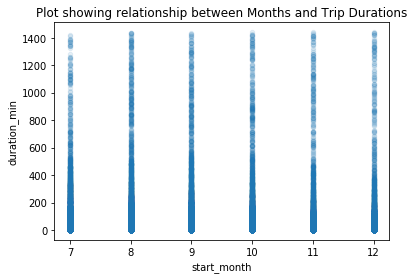

In [16]:
# Explore the relationship between start_month and duration_min
plt.figure(figsize = [12,12]) 
new_df.plot(x = 'start_month', y = 'duration_min', kind = 'scatter', alpha = 0.1);
plt.title('Plot showing relationship between Months and Trip Durations');

>There is no clear trend in the relationship between Trip duration and the months. There isn't much difference in the trip duration for each month. Therefore, we can conclude that individual months do not affect the trip duration.

### Let's explore the relationship between Trip Duration and other features

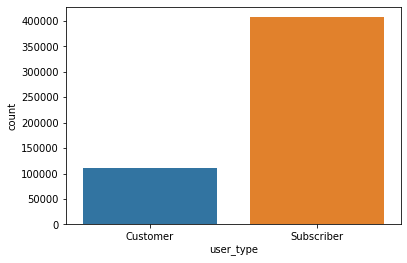

In [17]:
sb.countplot(data=new_df, x='user_type')

> From the above plot, it is clear that number of subscribers are considerably more than customers

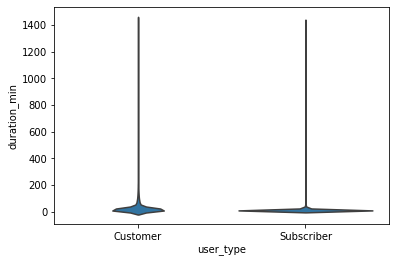

In [18]:
# Relationship bwetween Trip Duration and User type
base_color = sb.color_palette()[0]
sb.violinplot(data = new_df, x = 'user_type', y = 'duration_min', color = base_color,
              inner = None)

Text(0, 0.5, 'Avg. value of duration_min')

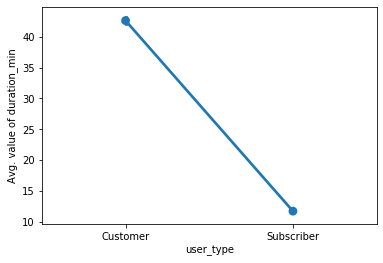

In [19]:
sb.pointplot(data = new_df, x = 'user_type', y = 'duration_min')
plt.ylabel('Avg. value of duration_min')

> The plots above don't seem to give much information about the trend between the user_type and trip duration. Although the pointplot above could perhaps indicate that customers take bikes on longer trips than subscribers.

## Multivariate Exploration

> Here, we will create plots of three or more variables to investigate the data even further.

#### Case 4: Whether the user being either a subscriber or customer affects how long the trip takes.

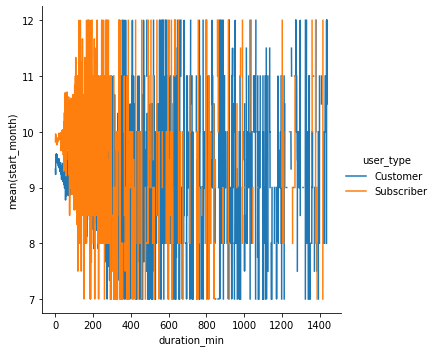

In [20]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)
    
bin_edges = np.arange(0.25, new_df['duration_min'].max()+0.5, 0.5)
g = sb.FacetGrid(data = new_df, hue = 'user_type', height = 5)
g.map(mean_poly, "duration_min", "start_month", bins = bin_edges)
g.set_ylabels('mean(start_month)')
g.add_legend()

> From the plot above, we can say that customers rent out bikes for longer trips.

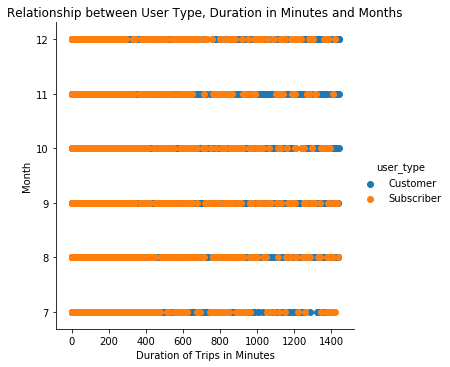

In [21]:
g = sb.FacetGrid(data = new_df, hue = 'user_type', height = 5)
g.map(plt.scatter, 'duration_min', 'start_month')
g.add_legend()
plt.xlabel('Duration of Trips in Minutes');
plt.ylabel('Month');
plt.title('Relationship between User Type, Duration in Minutes and Months');

> From the plot above, it shows the already determined fact of the count of subscribers being more than customers. Hence, we can conclude that user type does have an effect on duration of trips. It can also be seen here that customers, despite being smaller in number, tend to rent out bikes for longer trips.


> Due to the fact that most of the values are discrete in nature, there was no clear correlation between the other features. There was also NO interesting interaction.